the main function of this program is to prepare the data downloaded from kaggle.com for further work.

this program also provide a playground for some EDA of the image data.  

the input format is .json file. the output format is .npy file.

The output file names:

1. train.npy
2. test.npy

3. X_train_rotate.npy
4. target_train.npy
5. X_test.npy
6. test_id.npy



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Process the training data

In [2]:
#Load the data.
train = pd.read_json("train.json")
test = pd.read_json("test.json")

#output the data
np.save('train',train)
np.save('test',test)

In [10]:
train.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [19]:
test.head()

,band_1,band_2,id,inc_angle
0,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",5941774d,34.966400
1,"[-26.058969497680664, -26.058969497680664, -26...","[-25.754207611083984, -25.754207611083984, -25...",4023181e,32.615072
2,"[-14.14109992980957, -15.064241409301758, -17....","[-14.74563980102539, -14.590410232543945, -14....",b20200e4,37.505433
3,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",e7f018bb,34.473900
4,"[-23.37459373474121, -26.02718162536621, -28.1...","[-25.72234344482422, -27.011577606201172, -23....",4371c8c3,43.918874


In [3]:
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis,], X_band_2[:, :, :, np.newaxis,]], axis=-1)

#plot one of the image
X_band_1[1].shape


(75, 75)

### rotate the images 90 degrees and 180 degrees respectively (to increase the amount of training data)

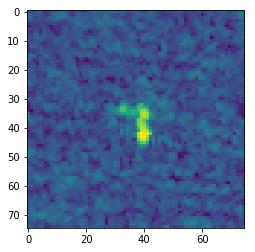

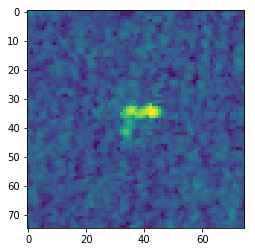

In [4]:
X_band_1_rotate90 = np.array([np.rot90(image) for image in X_band_1])
X_band_2_rotate90 = np.array([np.rot90(image) for image in X_band_2])
plt.imshow(X_band_1_rotate90[1])

X_band_1_rotate180 = np.array([np.rot90(image,2) for image in X_band_1])
X_band_2_rotate180 = np.array([np.rot90(image,2) for image in X_band_2])
plt.figure()
plt.imshow(X_band_1_rotate180[1])

In [5]:
#combine all the data together
X_train_rotate90 = np.concatenate([X_band_1_rotate90[:, :, :, np.newaxis], X_band_2_rotate90[:, :, :, np.newaxis]], axis=-1)
X_train_rotate180 = np.concatenate([X_band_1_rotate180[:, :, :, np.newaxis], X_band_2_rotate180[:, :, :, np.newaxis]], axis=-1)

X_train_rotate = np.concatenate([X_train, X_train_rotate90, X_train_rotate180],axis = 0)
target_train=np.concatenate([train['is_iceberg'],train['is_iceberg'],train['is_iceberg']],axis = 0)


In [6]:
#data output
np.save('X_train_rotate',X_train_rotate)
np.save('target_train',target_train)


### Process the testing data

In [7]:
X_band_test_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_1"]])
X_band_test_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test["band_2"]])
X_test = np.concatenate([X_band_test_1[:, :, :, np.newaxis]
                          , X_band_test_2[:, :, :, np.newaxis]], axis=-1)

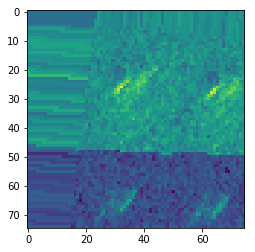

In [20]:
#check the dataset in the testing data, when the digit after decimal is very long, it maybe some distracting data
# or so said men-made data. The evaluation would take those images into account.
plt.imshow(X_band_test_1[5])

In [ ]:
#data output
np.save("X_test", X_test)
np.save('test_id',test['id'])